In [205]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the Data

In [129]:
bikes = pd.read_csv('C:\\Users\\soura\\OneDrive\\Desktop\\UpGrad- AI & ML\\Machine Learning\\M.L.R. in Python\\day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [130]:
bikes.shape

(730, 16)

#### checking for any null values

In [131]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [132]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping columns not required for modeling

In [133]:
# drop-> instant, dteday, casual, registered
bikes.drop(columns=["instant","casual","registered","dteday"],inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [134]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [135]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [136]:
bikes.shape

(730, 12)

In [137]:
# Checking Correlation
bikes[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### When the correlation between two features is close to 1 (or -1), it indicates high similarity, and dropping one of the highly correlated features

In [138]:
# Drop the column "atemp":
bikes.drop(columns=["atemp"], inplace=True)

In [139]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


#### Dealing with Categorical Values As mentioned in Problem Statemet :
- variables like `weathersit` and `season` have values as 1, 2, 3, 4
- convert such feature values into categorical string values


In [140]:
bikes['season'] = bikes['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bikes['mnth'] = bikes['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
bikes['weekday'] = bikes['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bikes['weathersit'] = bikes['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'
})

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy_mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy_mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [141]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Step 2: Visualising the Data


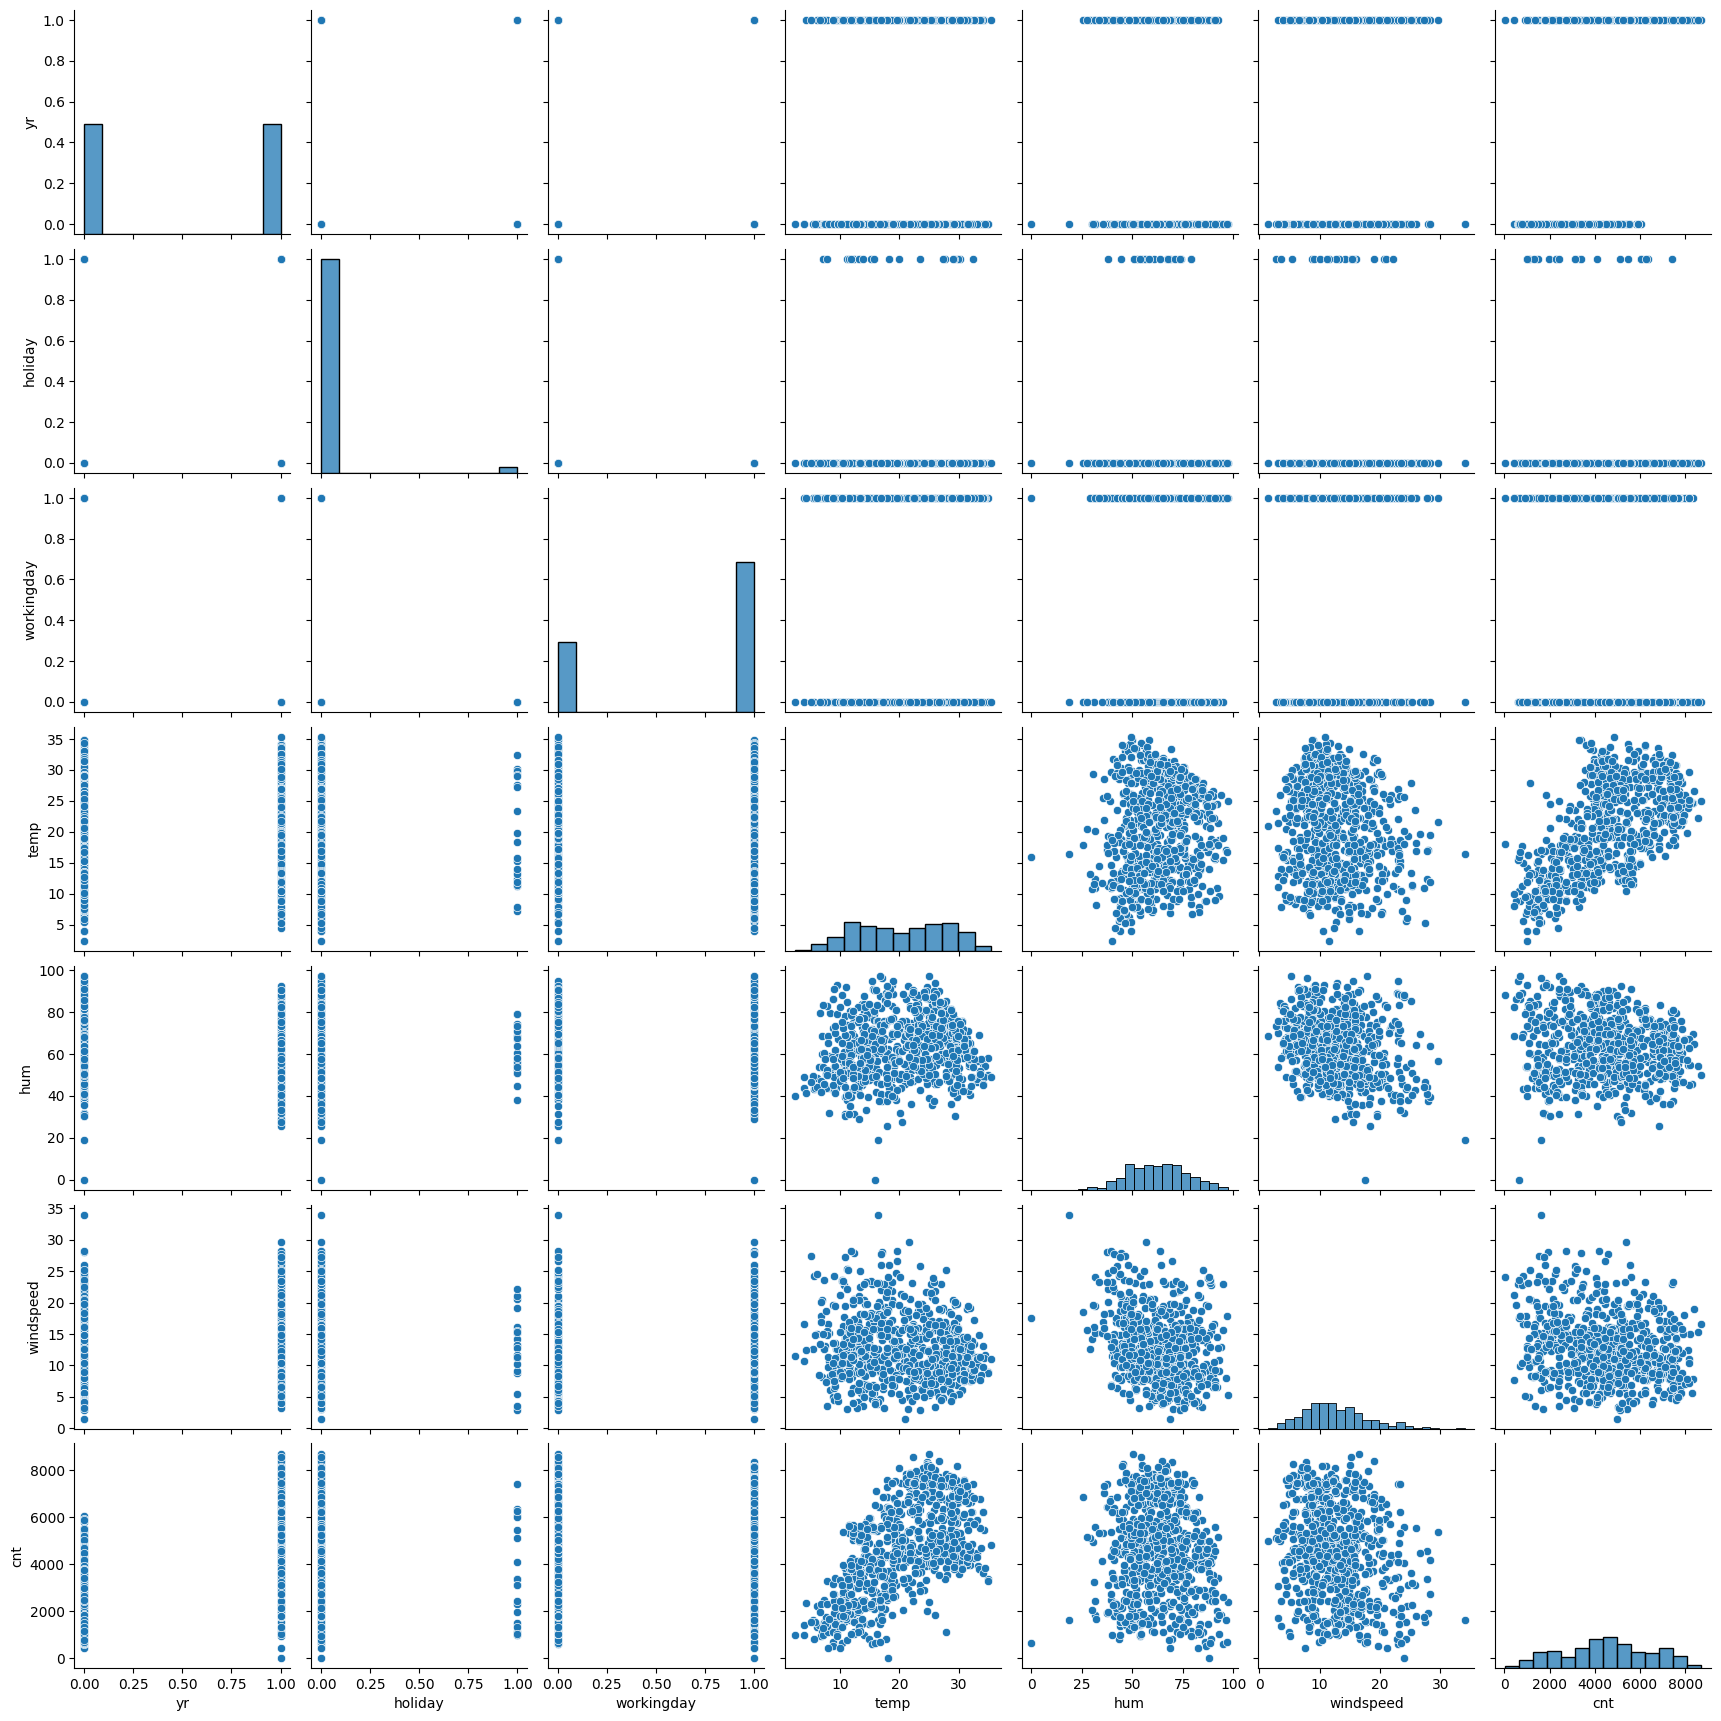

In [142]:
#  Visualizing data
sns.pairplot(bikes)

In [143]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy_mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy_mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


<Axes: xlabel='weathersit', ylabel='cnt'>

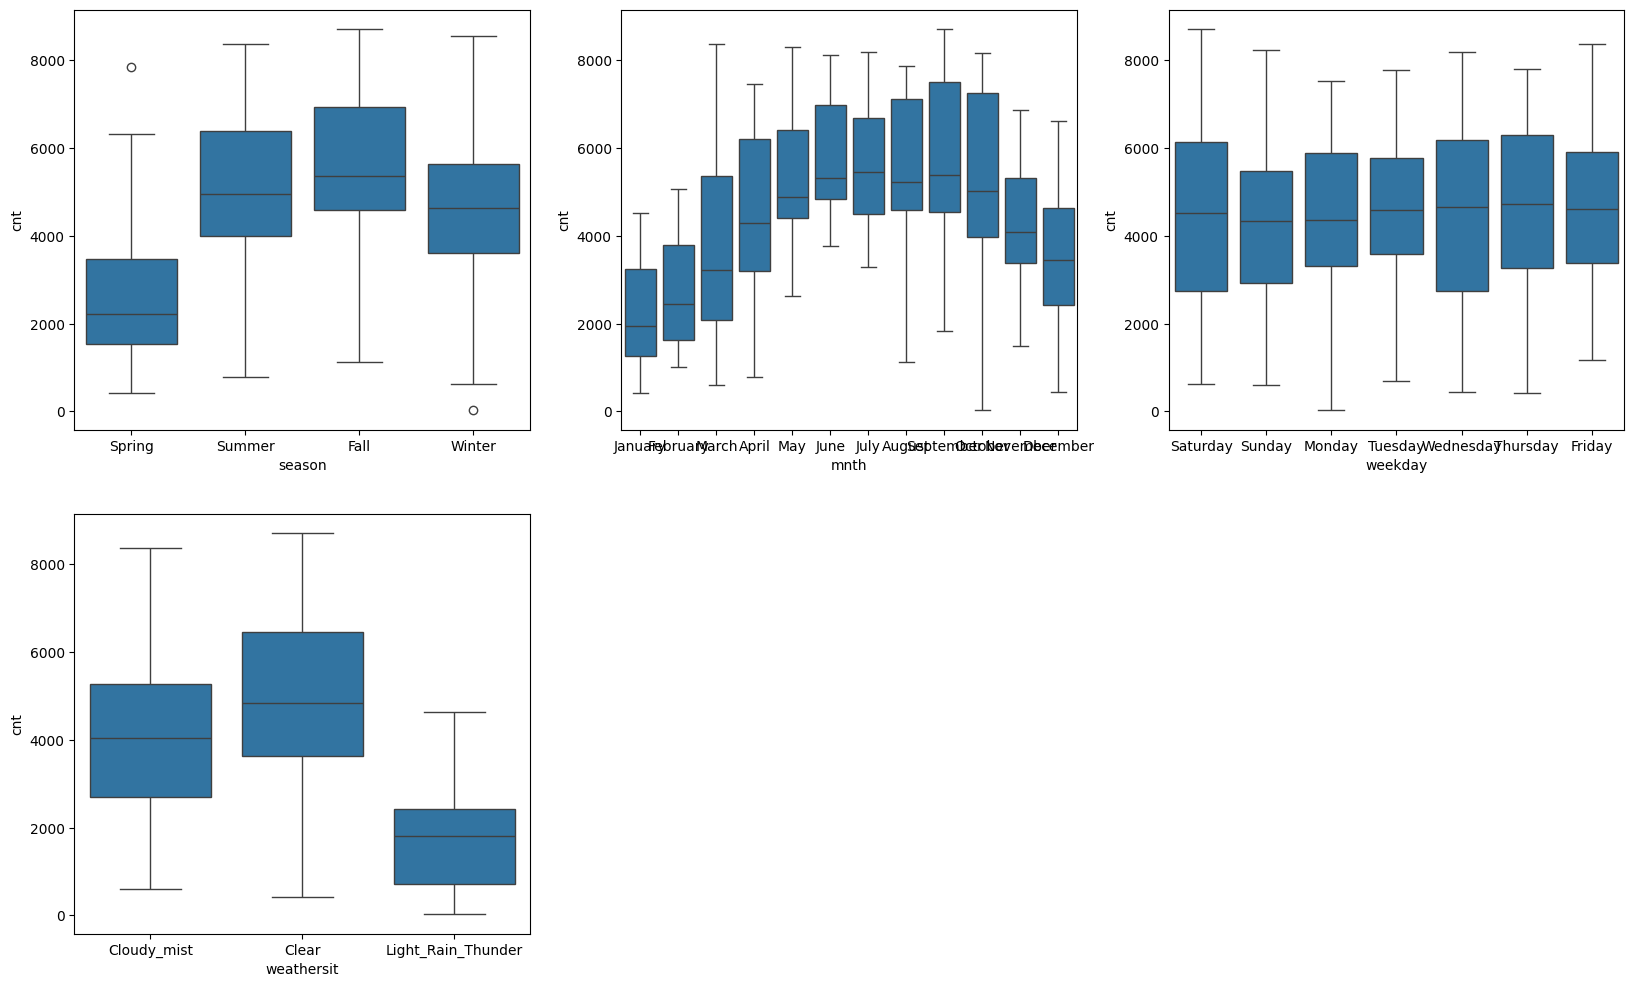

In [144]:
#  Visualizing categorical variables: BOX PLOTs

plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot( x='season', y= 'cnt', data=bikes)

plt.subplot(2,3,2)
sns.boxplot( x='mnth', y= 'cnt', data=bikes )

plt.subplot(2,3,3)
sns.boxplot( x='weekday', y= 'cnt', data=bikes )

plt.subplot(2,3,4)
sns.boxplot( x='weathersit', y= 'cnt', data=bikes )

####  Insights: 
1. Seasonal Analysis:<br>
- Fall has the highest average rentals, followed closely by summer.<br>
2. Monthly Trend:<br>
- September tops the monthly rental count, with surrounding months showing substantial demand.<br>
The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.<br>
3. Weekday Analysis:<br>
- Overall, no significant difference in rentals across weekdays is observed.<br>
Thursdays and Sundays stand out with higher variability in rental counts compared to other weekdays.<br> other weekdays.

# Step 3: Preparing the Data for Modelling:

- Encoding:
    - other cateogrical vars to Dummy vars       
 <br>

In [145]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy_mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy_mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


#### Dummy variables:

In [146]:
# creating dummy variables
season_dum = pd.get_dummies(bikes['season'],drop_first=True)
mnth_dum = pd.get_dummies(bikes['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(bikes['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(bikes['weathersit'],drop_first=True)

In [147]:
# Adding indicator variable columns to the dataset . Dropping original columns
bikes = pd.concat([bikes,season_dum, mnth_dum, weekday_dum, weathersit_dum], axis=1)
bikes.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

In [148]:
bikes = bikes.astype(int)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,0,14,80,10,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14,69,16,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8,43,16,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,59,10,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9,43,12,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets using Sci-kit learn and Rescaling

In [149]:
df_train, df_test = train_test_split( bikes, train_size= 0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### *Rescaling the Features:

- not much imp in SLR, but in MLR is very imp to have comparable scales<br>
- Two ways:<br>
1. Min_max Scaling (normalization): b/w `0 and 1`<br>
2. Standardization <br>

This time, I will use `Min_max Scaling`, for both- Train and Test data data

In [150]:
 # 1. Instantiate an Object:
scaler = MinMaxScaler()

# list of numeric variables:
num_vars = ['temp','hum','windspeed']

# 2. fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.818182,0.721649,0.28125,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.424242,0.639175,0.25000,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.242424,0.494845,0.65625,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.393939,0.494845,0.18750,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.333333,0.742268,0.37500,1683,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [151]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533571,0.645826,0.322917,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225145,0.145867,0.165495,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.536082,0.218750,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.649485,0.312500,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.752577,0.406250,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

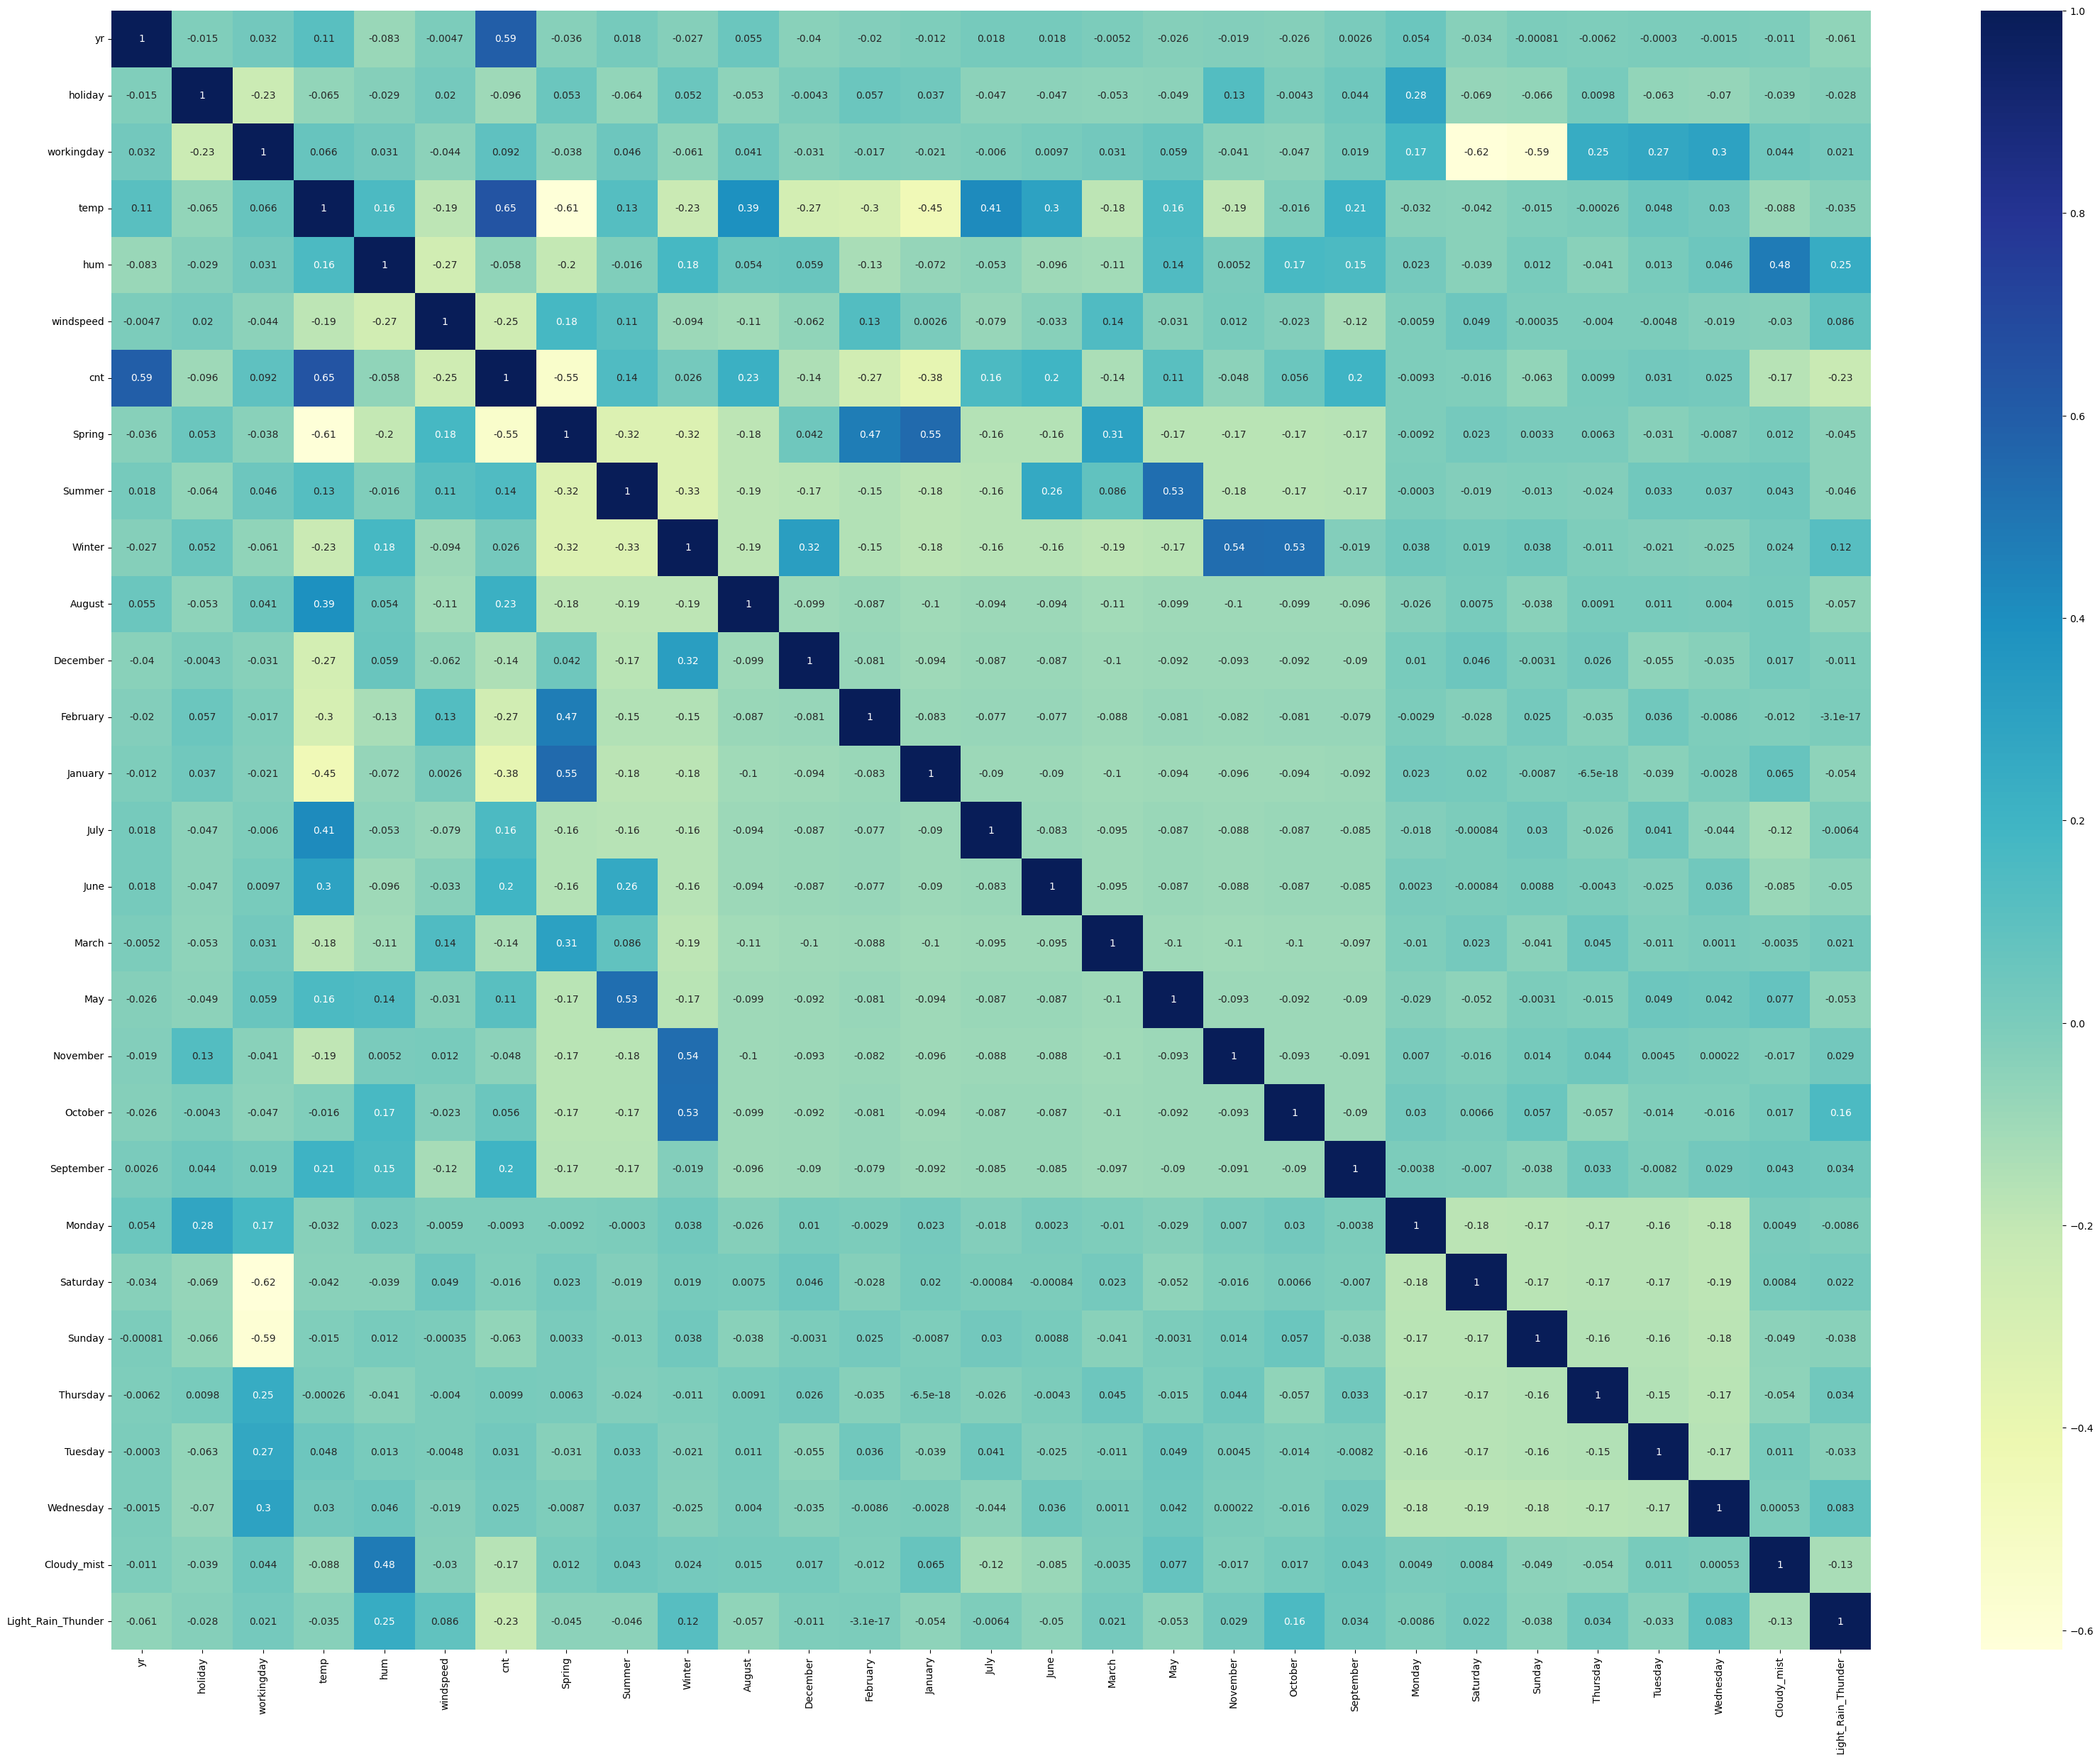

In [152]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")

# Step-5: Training the Model:

In [153]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.818182,0.721649,0.28125,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.424242,0.639175,0.25000,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.242424,0.494845,0.65625,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.393939,0.494845,0.18750,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.333333,0.742268,0.37500,1683,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
# Separating the target variable "cnt" from the features in the training data
y_train = df_train.pop("cnt")               # having only 'cnt' variable
X_train = df_train

In [155]:
# X_train.head()
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int32

### In ML Algo, we will see specifically:

- statistical significance of variables
- VIF


#### Fit a regression line through the training data using `statsmodels`.

- In statsmodels, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [156]:
#  add consatnt in statsmodels:
X_train_sm = sm.add_constant( X_train['temp'])

### Model-1: with `temp` as predictor:

In [157]:
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    1501.954289
temp     5591.351372
dtype: float64

In [158]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.07e-61
Time:                        05:42:03   Log-Likelihood:                -4449.5
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1501.9543    170.031      8.833      0.000    1167.904    1836.005
temp        5591.3514    293.642     19.041      0.000    5014.449    6168.254
==============================================================================
Omnibus:                        6.518   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.629
Skew:                           0.092   Prob(JB):                       0.0988
Kurtosis:                       2.571   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding all variable
The R-squared value obtained is `0.416`. Since we have so many variables, we can clearly do better than this. So let us add some other variables to identifyy

### Model 2: Multiiple linear regression model using all variables

In [159]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [160]:
# build a model with all variables:

# Add a constant column to the 'x_train' using statsmodels
X_train_sm = sm.add_constant(X_train)

#  create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          7.31e-181
Time:                        05:42:03   Log-Likelihood:                -4099.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     482   BIC:                             8374.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2183.4459    306.878      7.115      0.000    1580.462    2786.430
yr                  2016.9684     70.277     28.700      0.000    1878.881    2155.055
holiday              109.1554    209.443      0.521      0.602    -302.379     520.690
workingday           854.7985    106.605      8.018      0.000     645.331    1064.266
temp                3824.4707    402.599      9.499      0.000    3033.404    4615.537
hum                -1310.3248    336.101     -3.899      0.000   -1970.728    -649.921
windspeed          -1642.9687    229.939     -7.145      0.000   -2094.776   -1191.161
Spring              -412.5750    260.721     -1.582      0.114    -924.866      99.716
Summer               352.3545    227.330      1.550      0.122     -94.326     799.035
Winter               912.2175    243.180      3.751      0.000     434.393    1390.042
August               172.1120    292.691      0.588      0.557    -402.996     747.220
December            -394.2931    292.585     -1.348      0.178    -969.193     180.607
February            -299.2156    286.595     -1.044      0.297    -862.346     263.915
January             -574.3423    291.999     -1.967      0.050   -1148.090      -0.595
July                -286.0996    304.488     -0.940      0.348    -884.388     312.189
June                  51.2071    215.491      0.238      0.812    -372.211     474.625
March                 15.4494    214.015      0.072      0.942    -405.068     435.967
May                  216.9200    183.383      1.183      0.237    -143.408     577.248
November            -353.9258    316.682     -1.118      0.264    -976.174     268.322
October               59.7230    312.519      0.191      0.849    -554.345     673.791
September            742.1747    278.226      2.668      0.008     195.489    1288.861
Monday              -186.0089    133.545     -1.393      0.164    -448.411      76.393
Saturday             846.7984    119.483      7.087      0.000     612.026    1081.571
Sunday               372.6936    121.414      3.070      0.002     134.128     611.259
Thursday             -76.6579    135.317     -0.567      0.571    -342.542     189.226
Tuesday             -156.0819    135.077     -1.156      0.248    -421.494     109.330
Wednesday            -50.8981    129.905     -0.392      0.695    -306.148     204.352
Cloudy_mist         -521.2550     90.794     -5.741      0.000    -699.656    -342.854
Light_Rain_Thunder -2237.5079    229.738     -9.739      0.000   -2688.920   -1786.096
==============================================================================
Omnibus:                       85.280   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.664
Skew:                          -0.813   Prob(JB):             

## Checking VIF

Variance Inflation Factor -> give idea how much feature variables are correlated with each other. Its extremely important to test linear model.

`VIF`= 1/(1-R^2)

In [161]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.14
21,Saturday,19.64
22,Sunday,18.30
6,Spring,10.73
8,Winter,9.43
7,Summer,8.24
3,temp,7.03
17,November,6.78
18,October,6.47
9,August,6.38


#### We generally want a VIF that is `less than 5`. So there are clearly some variables we need to drop.

## Next step :
#### It can be seen some variables have very `high VIF value` and `high p_value` so its better to use `RFE` recursive feature elimination to decide the best variabless

In [162]:
# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm, n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)

In [163]:
rfe_table = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
22,Sunday,True,1
21,Saturday,True,1
19,September,True,1
17,November,True,1
16,May,True,1
26,Cloudy_mist,True,1
12,January,True,1
11,February,True,1
10,December,True,1


In [164]:
# selecting columns based of RFE
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'December', 'February', 'January', 'July', 'May',
       'November', 'September', 'Saturday', 'Sunday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [165]:
#Selecting selected feature for model creation
X_train_rfe = X_train[selected_features]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,December,February,January,July,May,November,September,Saturday,Sunday,Cloudy_mist,Light_Rain_Thunder
576,1,0,1,0.818182,0.721649,0.28125,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.424242,0.639175,0.25000,1,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.242424,0.494845,0.65625,1,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.393939,0.494845,0.18750,0,1,0,0,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.333333,0.742268,0.37500,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### Model 3: using RFE

#### Adding Selected variables to the model



In [166]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        05:42:05   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8327.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2216.4510    262.914      8.430      0.000    1699.873    2733.029
yr                  2010.7390     69.381     28.981      0.000    1874.418    2147.060
holiday               20.8044    189.392      0.110      0.913    -351.317     392.926
workingday           831.6546     86.021      9.668      0.000     662.638    1000.671
temp                3897.5675    332.212     11.732      0.000    3244.831    4550.304
hum                -1335.7239    327.565     -4.078      0.000   -1979.329    -692.118
windspeed          -1655.1781    227.061     -7.290      0.000   -2101.311   -1209.045
Spring              -496.1718    190.316     -2.607      0.009    -870.107    -122.236
Summer               242.9061    146.872      1.654      0.099     -45.670     531.482
Winter               846.0068    154.542      5.474      0.000     542.360    1149.653
December            -429.1326    157.606     -2.723      0.007    -738.799    -119.466
February            -320.9033    185.949     -1.726      0.085    -686.260      44.453
January             -590.2456    184.255     -3.203      0.001    -952.272    -228.219
July                -434.6978    156.244     -2.782      0.006    -741.689    -127.707
May                  196.3211    150.453      1.305      0.193     -99.291     491.933
November            -401.7527    163.278     -2.461      0.014    -722.565     -80.941
September            626.5912    144.746      4.329      0.000     342.191     910.991
Saturday             919.9397    103.470      8.891      0.000     716.641    1123.239
Sunday               444.0522    107.811      4.119      0.000     232.223     655.882
Cloudy_mist         -510.3754     89.783     -5.685      0.000    -686.782    -333.968
Light_Rain_Thunder -2229.0273    227.179     -9.812      0.000   -2675.392   -1782.662
==============================================================================
Omnibus:                       84.653   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.804
Skew:                          -0.801   Prob(JB):                     1.39e-52
Kurtosis:                       5.944   Cond. No.                     6.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking VIF

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,60.79
16,Saturday,14.58
17,Sunday,13.91
6,Spring,5.77
3,temp,4.84
8,Winter,3.85
7,Summer,3.48
1,holiday,3.44
11,January,2.37
4,hum,1.97


### Model 4:
#### Removing the variable `workingday` based on its Very High 'VIF' value..

In [168]:
# Drop the column "workingday" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["workingday"], axis=1, inplace=True)

In [169]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        05:42:06   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8327.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3048.1056    322.087      9.464      0.000    2415.263    3680.948
yr                  2010.7390     69.381     28.981      0.000    1874.418    2147.060
holiday             -810.8502    220.842     -3.672      0.000   -1244.765    -376.936
temp                3897.5675    332.212     11.732      0.000    3244.831    4550.304
hum                -1335.7239    327.565     -4.078      0.000   -1979.329    -692.118
windspeed          -1655.1781    227.061     -7.290      0.000   -2101.311   -1209.045
Spring              -496.1718    190.316     -2.607      0.009    -870.107    -122.236
Summer               242.9061    146.872      1.654      0.099     -45.670     531.482
Winter               846.0068    154.542      5.474      0.000     542.360    1149.653
December            -429.1326    157.606     -2.723      0.007    -738.799    -119.466
February            -320.9033    185.949     -1.726      0.085    -686.260      44.453
January             -590.2456    184.255     -3.203      0.001    -952.272    -228.219
July                -434.6978    156.244     -2.782      0.006    -741.689    -127.707
May                  196.3211    150.453      1.305      0.193     -99.291     491.933
November            -401.7527    163.278     -2.461      0.014    -722.565     -80.941
September            626.5912    144.746      4.329      0.000     342.191     910.991
Saturday              88.2851     96.312      0.917      0.360    -100.950     277.520
Sunday              -387.6024     99.667     -3.889      0.000    -583.429    -191.776
Cloudy_mist         -510.3754     89.783     -5.685      0.000    -686.782    -333.968
Light_Rain_Thunder -2229.0273    227.179     -9.812      0.000   -2675.392   -1782.662
==============================================================================
Omnibus:                       84.653   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.804
Skew:                          -0.801   Prob(JB):                     1.39e-52
Kurtosis:                       5.944   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.33
2,temp,18.26
5,Spring,5.48
4,windspeed,5.05
7,Winter,4.07
6,Summer,3.35
10,January,2.37
17,Cloudy_mist,2.34
0,yr,2.11
9,February,1.92


### Model 5:
#### Removing the variable `hum` based on its Very High 'VIF' value.

In [171]:
# Drop the column "hum" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["hum"], axis=1, inplace=True)

In [172]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.8
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          3.48e-186
Time:                        05:42:06   Log-Likelihood:                -4109.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     491   BIC:                             8338.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2417.0331    286.930      8.424      0.000    1853.271    2980.796
yr                  2042.0531     70.044     29.154      0.000    1904.431    2179.675
holiday             -820.9985    224.315     -3.660      0.000   -1261.734    -380.263
temp                3574.7604    327.737     10.907      0.000    2930.820    4218.701
windspeed          -1411.1111    222.489     -6.342      0.000   -1848.258    -973.964
Spring              -554.5195    192.774     -2.877      0.004    -933.282    -175.757
Summer               215.8964    149.039      1.449      0.148     -76.936     508.729
Winter               734.5167    154.506      4.754      0.000     430.943    1038.091
December            -491.9884    159.327     -3.088      0.002    -805.035    -178.942
February            -337.0077    188.843     -1.785      0.075    -708.048      34.032
January             -649.4340    186.582     -3.481      0.001   -1016.032    -282.836
July                -393.7839    158.384     -2.486      0.013    -704.977     -82.591
May                  120.2679    151.649      0.793      0.428    -177.694     418.230
November            -406.4800    165.852     -2.451      0.015    -732.348     -80.612
September            570.2170    146.360      3.896      0.000     282.649     857.785
Saturday             101.2112     97.779      1.035      0.301     -90.907     293.329
Sunday              -414.4671    101.019     -4.103      0.000    -612.950    -215.984
Cloudy_mist         -720.7813     74.635     -9.657      0.000    -867.425    -574.138
Light_Rain_Thunder -2606.8372    210.702    -12.372      0.000   -3020.826   -2192.848
==============================================================================
Omnibus:                       87.479   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.369
Skew:                          -0.821   Prob(JB):                     2.61e-55
Kurtosis:                       6.022   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF


In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.49
3,windspeed,4.99
4,Spring,4.40
6,Winter,3.05
5,Summer,2.82
9,January,2.21
0,yr,2.09
8,February,1.88
12,November,1.83
10,July,1.60


### Model 6:
#### Removing the variable `May` based on its Very High 'p' value.

In [174]:
# Drop the column "May" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["May"], axis=1, inplace=True)

In [175]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          3.71e-187
Time:                        05:42:06   Log-Likelihood:                -4110.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     492   BIC:                             8333.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2377.8485    282.537      8.416      0.000    1822.720    2932.977
yr                  2038.0764     69.838     29.183      0.000    1900.860    2175.293
holiday             -825.7598    224.150     -3.684      0.000   -1266.169    -385.351
temp                3631.6338    319.674     11.360      0.000    3003.539    4259.729
windspeed          -1425.3844    221.676     -6.430      0.000   -1860.933    -989.836
Spring              -532.3830    190.670     -2.792      0.005    -907.011    -157.755
Summer               269.0363    133.077      2.022      0.044       7.567     530.505
Winter               748.4653    153.444      4.878      0.000     446.980    1049.951
December            -482.9318    158.857     -3.040      0.002    -795.054    -170.810
February            -329.1682    188.513     -1.746      0.081    -699.558      41.221
January             -638.9150    186.040     -3.434      0.001   -1004.446    -273.384
July                -397.3129    158.261     -2.510      0.012    -708.264     -86.361
November            -397.3535    165.390     -2.403      0.017    -722.312     -72.395
September            571.6825    146.293      3.908      0.000     284.247     859.118
Saturday              97.9380     97.655      1.003      0.316     -93.935     289.811
Sunday              -414.5663    100.981     -4.105      0.000    -612.973    -216.160
Cloudy_mist         -716.5441     74.415     -9.629      0.000    -862.755    -570.333
Light_Rain_Thunder -2607.4813    210.621    -12.380      0.000   -3021.309   -2193.654
==============================================================================
Omnibus:                       85.907   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.778
Skew:                          -0.818   Prob(JB):                     1.41e-52
Kurtosis:                       5.926   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF:

In [176]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.37
3,windspeed,4.90
4,Spring,4.39
6,Winter,3.05
5,Summer,2.27
9,January,2.21
0,yr,2.08
8,February,1.88
11,November,1.83
10,July,1.60


### Model 7:
#### Removing the variable `Saturday` based on its Very High 'p' value.

In [177]:
# Drop the column "Saturday" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["Saturday"], axis=1, inplace=True)

In [178]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          4.64e-188
Time:                        05:42:06   Log-Likelihood:                -4110.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     493   BIC:                             8327.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2397.8498    281.834      8.508      0.000    1844.105    2951.594
yr                  2036.0093     69.808     29.166      0.000    1898.852    2173.166
holiday             -844.1144    223.403     -3.778      0.000   -1283.054    -405.175
temp                3623.6869    319.578     11.339      0.000    2995.784    4251.590
windspeed          -1414.2590    221.399     -6.388      0.000   -1849.262    -979.256
Spring              -530.8745    190.665     -2.784      0.006    -905.491    -156.258
Summer               267.5493    133.069      2.011      0.045       6.096     529.002
Winter               750.7996    153.427      4.894      0.000     449.349    1052.251
December            -481.0713    158.847     -3.029      0.003    -793.172    -168.971
February            -335.9789    188.392     -1.783      0.075    -706.128      34.171
January             -640.5049    186.034     -3.443      0.001   -1006.023    -274.987
July                -394.0633    158.229     -2.490      0.013    -704.950     -83.177
November            -401.2019    165.347     -2.426      0.016    -726.073     -76.331
September            572.0344    146.293      3.910      0.000     284.599     859.469
Sunday              -432.9605     99.302     -4.360      0.000    -628.067    -237.854
Cloudy_mist         -716.8984     74.415     -9.634      0.000    -863.108    -570.689
Light_Rain_Thunder -2607.2593    210.622    -12.379      0.000   -3021.087   -2193.432
==============================================================================
Omnibus:                       82.395   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.166
Skew:                          -0.776   Prob(JB):                     8.60e-52
Kurtosis:                       5.942   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.32
3,windspeed,4.87
4,Spring,4.37
6,Winter,3.03
5,Summer,2.26
9,January,2.21
0,yr,2.08
8,February,1.88
11,November,1.83
10,July,1.60


### Model 8:
#### Removing the variable `February` based on its Very High 'p' value.

In [180]:
# Drop the column "February" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["February"], axis=1, inplace=True)

In [181]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.65e-188
Time:                        05:42:06   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2281.9731    274.847      8.303      0.000    1741.960    2821.986
yr                  2032.9126     69.940     29.067      0.000    1895.496    2170.329
holiday             -868.0977    223.489     -3.884      0.000   -1307.205    -428.991
temp                3765.8594    310.157     12.142      0.000    3156.469    4375.250
windspeed          -1397.4607    221.687     -6.304      0.000   -1833.026    -961.896
Spring              -625.6752    183.509     -3.410      0.001    -986.230    -265.121
Summer               296.9850    132.333      2.244      0.025      36.980     556.990
Winter               764.6081    153.569      4.979      0.000     462.879    1066.337
December            -395.6353    151.785     -2.607      0.009    -693.859     -97.412
January             -462.0204    157.166     -2.940      0.003    -770.817    -153.224
July                -402.3610    158.509     -2.538      0.011    -713.797     -90.925
November            -356.2853    163.777     -2.175      0.030    -678.072     -34.499
September            585.2350    146.428      3.997      0.000     297.537     872.933
Sunday              -436.5101     99.501     -4.387      0.000    -632.007    -241.013
Cloudy_mist         -717.4919     74.578     -9.621      0.000    -864.022    -570.962
Light_Rain_Thunder -2600.3489    211.051    -12.321      0.000   -3015.017   -2185.681
==============================================================================
Omnibus:                       77.289   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.095
Skew:                          -0.732   Prob(JB):                     4.38e-48
Kurtosis:                       5.849   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [182]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.27
3,windspeed,4.86
6,Winter,2.99
4,Spring,2.94
5,Summer,2.26
0,yr,2.08
10,November,1.82
8,January,1.66
9,July,1.60
13,Cloudy_mist,1.57


### Model 9:
#### Removing the variable `November` and `Summer` based on its Very High 'p' value.

In [183]:
# Drop the column "November", "Summer" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["November", "Summer"], axis=1, inplace=True)

In [184]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.67e-188
Time:                        05:42:06   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2554.6455    215.571     11.851      0.000    2131.100    2978.191
yr                  2037.0518     70.586     28.859      0.000    1898.368    2175.736
holiday             -929.9812    224.091     -4.150      0.000   -1370.267    -489.696
temp                3602.7524    274.125     13.143      0.000    3064.163    4141.342
windspeed          -1359.8652    223.079     -6.096      0.000   -1798.162    -921.568
Spring              -877.8824    134.089     -6.547      0.000   -1141.336    -614.429
Winter               407.6656    108.781      3.748      0.000     193.938     621.393
December            -306.2733    139.796     -2.191      0.029    -580.940     -31.607
January             -465.7452    156.408     -2.978      0.003    -773.049    -158.442
July                -551.7866    149.424     -3.693      0.000    -845.368    -258.205
September            488.2395    135.097      3.614      0.000     222.807     753.672
Sunday              -429.0306    100.451     -4.271      0.000    -626.392    -231.669
Cloudy_mist         -705.6001     75.218     -9.381      0.000    -853.385    -557.815
Light_Rain_Thunder -2577.3261    212.430    -12.133      0.000   -2994.700   -2159.952
==============================================================================
Omnibus:                       68.314   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.253
Skew:                          -0.660   Prob(JB):                     5.93e-41
Kurtosis:                       5.641   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [185]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.78
3,windspeed,4.15
4,Spring,2.39
0,yr,2.06
5,Winter,1.66
7,January,1.64
11,Cloudy_mist,1.54
8,July,1.36
6,December,1.29
9,September,1.20


### Model 10:
#### Removing the variable `December` based on its Very High 'p' value.

In [186]:
# Drop the column "December" from the DataFrame 'X_train_rfe'
X_train_rfe.drop(["December"], axis=1, inplace=True)

In [187]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

#  create model using Ordinary Least Squares (OLS) method using statsmodels
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.92e-188
Time:                        05:42:06   Log-Likelihood:                -4120.8
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     497   BIC:                             8323.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2452.5398    211.276     11.608      0.000    2037.436    2867.644
yr                  2037.6612     70.855     28.758      0.000    1898.450    2176.873
holiday             -914.1161    224.829     -4.066      0.000   -1355.848    -472.384
temp                3724.7875    269.430     13.825      0.000    3195.425    4254.150
windspeed          -1304.8415    222.507     -5.864      0.000   -1742.011    -867.672
Spring              -892.5159    134.434     -6.639      0.000   -1156.645    -628.387
Winter               361.8065    107.155      3.376      0.001     151.274     572.339
January             -394.9737    153.620     -2.571      0.010    -696.798     -93.150
July                -571.7299    149.715     -3.819      0.000    -865.882    -277.577
September            498.5118    135.531      3.678      0.000     232.228     764.795
Sunday              -422.5592    100.791     -4.192      0.000    -620.587    -224.531
Cloudy_mist         -704.5802     75.504     -9.332      0.000    -852.926    -556.235
Light_Rain_Thunder -2551.8043    212.920    -11.985      0.000   -2970.138   -2133.471
==============================================================================
Omnibus:                       62.583   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.997
Skew:                          -0.617   Prob(JB):                     4.03e-36
Kurtosis:                       5.479   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [188]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.78
3,windspeed,4.14
4,Spring,2.27
0,yr,2.06
6,January,1.60
10,Cloudy_mist,1.54
5,Winter,1.41
7,July,1.36
8,September,1.20
9,Sunday,1.18


# Step-6: Residual Analysis of Train data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [189]:
# Predict the target variable 'y_train' using the trained regression model 'lr_model' and the DataFrame 'X_train_sm'
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    6599.037827
426    4147.107427
728    3221.802495
482    5008.303577
111    2500.239891
          ...     
578    7405.969010
53     2187.025187
350    2441.876747
79     2747.847798
520    5553.752230
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

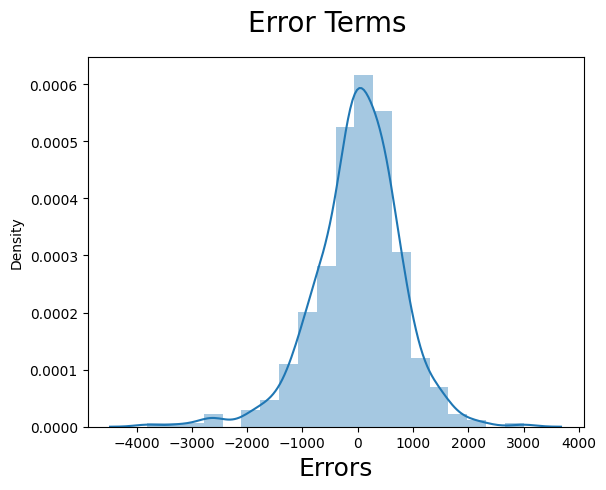

In [190]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Step-7: Predictions and Evaluation on the Test Set:

- fit() on Training data
- Transform() on Test dataset
- fit_transform()

##### Now that we have fitted the model and checked the normality of error terms, it’s time to go ahead and make predictions using the final

In [191]:
# Apply scaler() to all(numeric) the columns, except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed']

# 2. transform the data
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,0,1,0,0.838710,0.527778,0.153846,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.935484,0.472222,0.230769,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.516129,0.777778,0.461538,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.903226,0.236111,0.461538,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.838710,0.069444,0.692308,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [192]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.557331,0.506439,0.426923,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.247770,0.200292,0.190664,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354839,0.357639,0.307692,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.548387,0.486111,0.423077,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774194,0.652778,0.538462,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
y_test = df_test.pop('cnt')
X_test = df_test

In [194]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
184,1.0,0,1,0,0.838710,0.527778,0.153846,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.935484,0.472222,0.230769,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.516129,0.777778,0.461538,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.903226,0.236111,0.461538,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.838710,0.069444,0.692308,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [195]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,Spring,Winter,January,July,September,Sunday,Cloudy_mist,Light_Rain_Thunder
576,1,0,0.818182,0.28125,0,0,0,1,0,0,0,0
426,1,0,0.424242,0.25000,1,0,0,0,0,0,1,0
728,1,0,0.242424,0.65625,1,0,0,0,0,1,0,0
482,1,0,0.393939,0.18750,0,0,0,0,0,0,1,0
111,0,0,0.333333,0.37500,0,0,0,0,0,0,1,0


In [196]:
X_test_sm = X_test_sm[['yr', 'holiday', 'temp', 'windspeed', "Spring", 'Winter', 'January', 'July', 'September', 'Sunday', 'Cloudy_mist', 'Light_Rain_Thunder']]

In [198]:
X_test_sm.head()

,yr,holiday,temp,windspeed,Spring,Winter,January,July,September,Sunday,Cloudy_mist,Light_Rain_Thunder
184,0,1,0.838710,0.153846,0,0,0,1,0,0,1,0
535,1,0,0.935484,0.230769,0,0,0,0,0,0,0,0
299,0,0,0.516129,0.461538,0,1,0,0,0,0,1,0
221,0,0,0.903226,0.461538,0,0,0,0,0,0,0,0
152,0,0,0.838710,0.692308,0,0,0,0,0,0,0,0


In [199]:
# Adding constant 
X_test_sm = sm.add_constant(X_test_sm)

# Making predictions
y_test_pred = lr_model.predict(X_test_sm)

# Step-8: Model Evaluation

##### Let’s now plot the graph for actual versus predicted values.


Text(0, 0.5, 'y_test_pred')

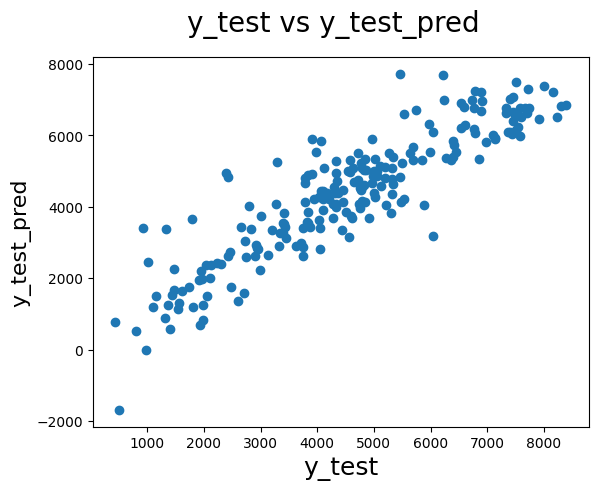

In [201]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                               # X-label
plt.ylabel('y_test_pred', fontsize = 16)                          # y-label

#### Plotting Actual vs Predicted 

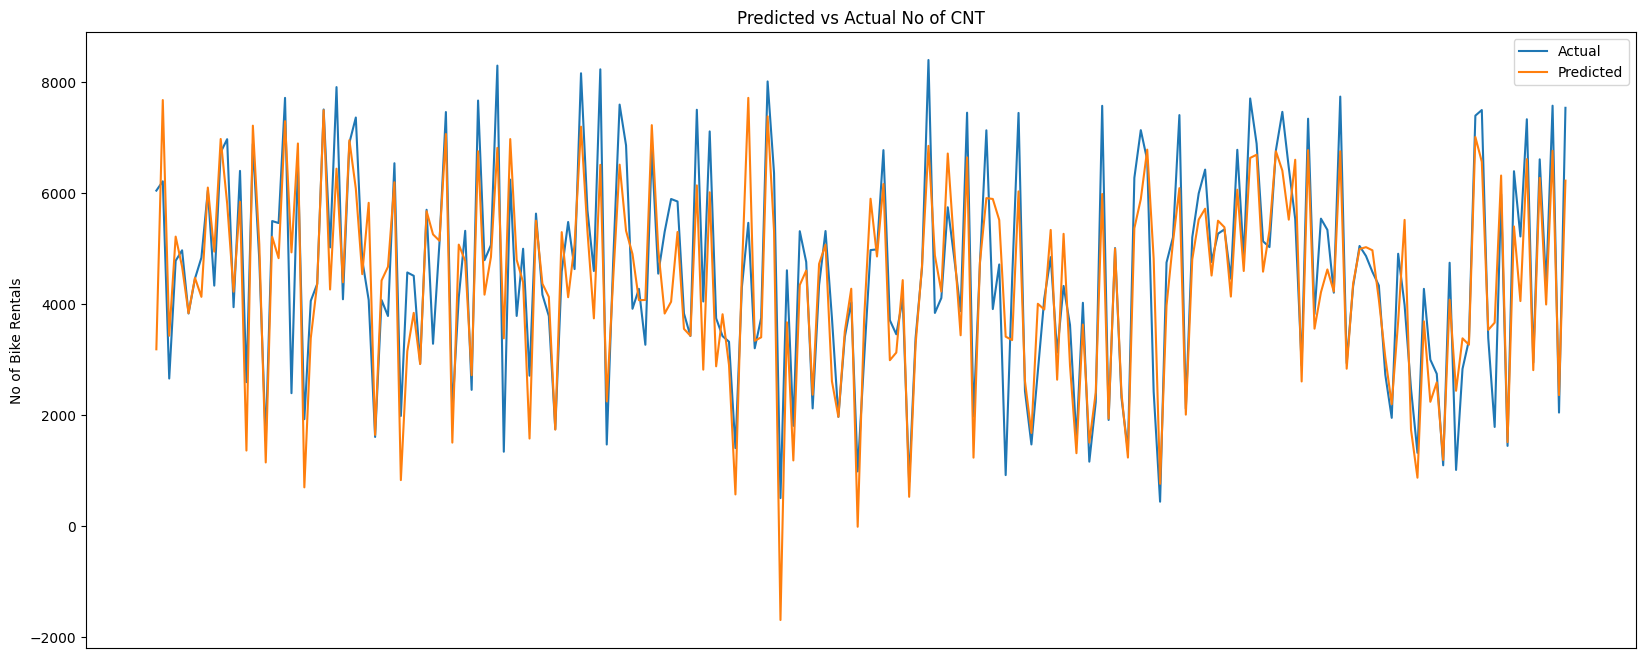

In [203]:
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

### Visualizing the fit on the Test data

##### plotting a Regression plot

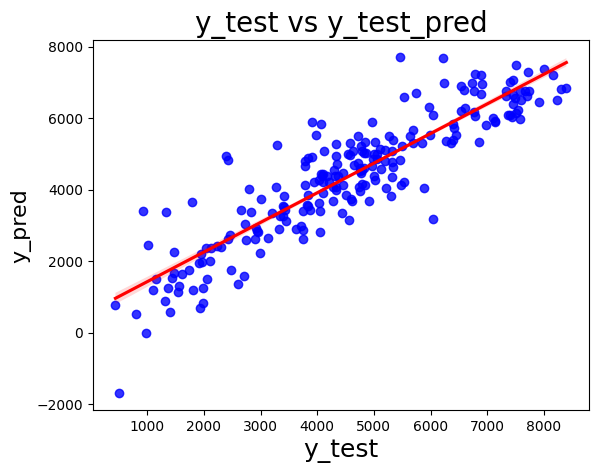

In [204]:
# Visualizing the fit on the Test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [206]:
# CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA 

mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8392356657248362
R-squared for test data: 0.7910029403657204
Mean Squared Error 868.898


In [207]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7910029403657204

In [208]:
lr_model.params.to_frame()

,0
const,2452.539844
yr,2037.661209
holiday,-914.116089
temp,3724.787478
windspeed,-1304.841503
Spring,-892.515904
Winter,361.806493
January,-394.973749
July,-571.729945
September,498.511758


# Multiple Linear Regression Model Summary

### Dependent Variable: CNT

### Coefficients:

##### const              2452.5
##### yr                 2037.6
##### holiday           -914.1
##### temp	             3724.7
##### windspeed	        -1304.8
##### Spring	        -892.5
##### Winter	         361.8
##### January	        -394.9
##### July	            -571.7
##### September	         498.5
##### Sunday	        -422.5
##### Cloudy_mist       -704.5
##### Light_Rain_Thunder -2551.8  <br>

### Interpretation:

##### The constant term (intercept) is `2452.5`.
##### The ‘yr’ (year) variable has a coefficient of `2037.6`.
##### ‘temp’ (temperature) has a coefficient of `3724.7`.
##### ‘windspeed’ has a coefficient of `-1304.8`.
##### Other variables represent the impact on the dependent variable `CNT` based on their respective coefficients.

### *Regression Equation: 
##### `CNT` = 2452.5 + 2037.6 * `yr` - 914.1 * `holiday` + 3724.7 * `temp` - 1304.8 * `windspeed` - 892.5 * `Spring` + 361.8 * `Winter` - 394.9 * `January` - 571.7 * `July` + 498.5 * `September` - 422.5 * `Sunday` - 704.5 * `Cloudy_mist` - 2551.8 * `Light_Rain_Thunder`

# Final Report on Bike Booking Prediction

#### Overview:
###### Our final multiple linear regression model aims to predict bike bookings based on a set of predictor variables. After thorough analysis, we have identified the impact of each variable on bike bookings.

#### Top Predictor Variables:
###### Year (yr):
###### Coefficient: 2037.6
###### Interpretation: A unit increase in the year variable increases the bike hire numbers by 2037.6 units.

###### Temperature (temp):
###### Coefficient: 3724.7
###### Interpretation: A unit increase in the temperature variable increases the bike hire numbers by 3724.7 units.

###### Windspeed:
###### Coefficient: -1304.8
###### Interpretation: A unit increase in windspeed decreases the bike hire numbers by 1304.8 units.

#### Recommendations:
###### The top three predictor variables that significantly influence bike bookings are as follows:

###### Year (yr): Focus on understanding and leveraging the increasing trend over the years.
###### Temperature (temp): Consider the positive impact of temperature on bike bookings and plan activities accordingly.
###### Windspeed: Be mindful of the negative impact of windspeed on bike bookings and plan strategies to mitigate its effects.

#### Next Steps:

##### For further analysis, it is recommended to explore the following variables:

##### Holiday:
###### Coefficient: -914.1
###### Interpretation: The Spring season has a negative impact on bike bookings, decreasing them by 914.1 units.

##### Spring:
###### Coefficient: -892.5
###### Interpretation: The Winter season has a negative impact on bike bookings, decreasing them by 892.5 units.

##### Winter:
###### Coefficient: 361.8
###### Interpretation: The month of December has a positive impact on bike bookings, increasing them by 361.8 units.

##### January:
###### Coefficient: -394.9
###### Interpretation: The month of July has a negative impact on bike bookings, decreasing them by 394.9 units.

##### July:
###### Coefficient: -571.7
###### Interpretation: The month of November has a negative impact on bike bookings, decreasing them by 571.7 units.

##### September:
###### Coefficient: 498.5
###### Interpretation: The month of September has a positive impact on bike bookings, increasing them by 498.5 units.

##### Sunday:
###### Coefficient: -422.5
###### Interpretation: The month of September has a negative impact on bike bookings, decreasing them by 422.5 units.

##### Cloudy_mist:
###### Coefficient: -704.5
###### Interpretation: Cloudy and misty weather has a negative impact on bike bookings, decreasing them by 704.5 units.

##### Light_Rain_Thunder:
###### Coefficient: -2551.8
###### Interpretation: Light rain and thunderstorms have a significant negative impact on bike bookings, decreasing them by -2551.8 units.